# Práctica 0
Juan José Herrera Aranda

## Ejercicio 1

In [1]:
import numpy as np
import sympy as sp
from sklearn import datasets     # Importamos la base de datos
import matplotlib.pyplot as plt  # Importar módulo de visualización 

Cargamos la base de datos. La estructura de datos que nos devuelve es de la clase sklearn.tuils.Bunch, que es un contenedor que amplían los diccionarios permitiendo acceder a los valores por su clave, bunch["value_key"], o por un atributo, bunch.value_key.  

Por lo general, los conjuntos de datos cargados por Scikit-Learn suelen tener una estructura de diccionarios similar, que incluye lo siguiente:
- Una clave __DESCR__ describiendo el conjunto de datos
- Una clave __data__ que ccontiene una matriz con una fila por instancia y una columna por características
- Una clave __target__ que contiene una matriz con las etiquetas

In [2]:
iris = datasets.load_iris()   # Leemos datasets
print("Tipo: ",type(iris))    # Imprimimos el tipo de la estructura de datos
iris.keys()                   # Vemos las claves del objeto leído

Tipo:  <class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Mostramos algo más de información

In [3]:
print('Features names:  {}'.format(iris.feature_names))
print('Target names:    {}'.format(iris.target_names))

Features names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:    ['setosa' 'versicolor' 'virginica']


Creamos una correspondencia entre nombre de la clase y etiqueta que tiene

In [4]:
label_correspondence = {'setosa':0, 'versicolor':1, 'virginica':2}



Nos quedamos con los datos y sus etiquetas. Observamos que ambos son de type ndarray de numpy

In [5]:
X,y = iris['data'],iris['target']
# X,y = iris.data, iris.target   -  Ambas son equivalentes
print("Type(X) : {}".format(type(X)))
print("Type(y) : {}".format(type(y)))

Type(X) : <class 'numpy.ndarray'>
Type(y) : <class 'numpy.ndarray'>


Mostramos algunos ejemplos con sus etiquetas 

In [6]:
print('Ejemplos:\n {}'.format(X[:3]))
print('Etiquetas: {}' .format(y[:3]))

Ejemplos:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Etiquetas: [0 0 0]


Tomamos la primera y tercera característica

In [7]:
# Indicamos que vamos a coger todas las filas (instancias) y nos quedamos con las características 0 y 2 (primera y tercera)
X_1_3 = X[:,0:3:2] 
name_1_3 = iris.feature_names[0:3:2]
print("Características obtenidas: ", name_1_3)
print("Valores de las características (3 primeras instancias):\n ", X_1_3[:3])

Características obtenidas:  ['sepal length (cm)', 'petal length (cm)']
Valores de las características (3 primeras instancias):
  [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]


Visualizamos lo pedido en el enunciado

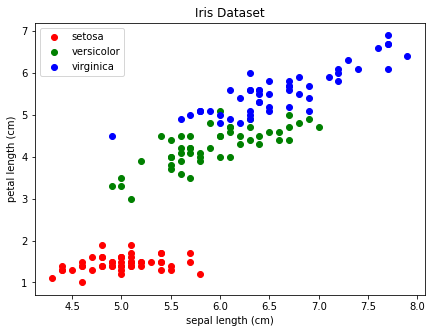

In [8]:
caracteristica_1 = 0
caracteristica_3 = 2

# Calcuflamos el número de puntos
n_samples = len(y)

# Cremos una figura
plt.figure(figsize=(7,5))

# Para cada clase {0,1,2} imprimimos los puntos
for clase in set(y):
    # Eje X: característica 1
    x = [X[i,caracteristica_1] for i in range(n_samples) if clase == y[i]]
    # Eje Y: característica 2
    yy = [X[i,caracteristica_3] for i in range(n_samples) if clase == y[i]]
    # Creamos el scatter plot e indicamos un color por clase junto con la etiqueta
    plt.scatter(x, yy, color=['red', 'green', 'blue'][clase], label=iris.target_names[clase])
    # Damos nombre a los ejes
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[2])
    # Damos un título a la figura
    plt.title('Iris Dataset')
    # Añadimos también una leyenda en la parte superior izquierda y con marco
    plt.legend(iris.target_names, loc='upper left',frameon = True)

# Mostramos la figura
plt.show()

## Ejercicio 2
Lo haremos de dos formas

In [9]:
# Cargamos el módulo necesario para la realización del ejercicio
from sklearn.model_selection import train_test_split 
from collections import Counter

### Primera forma: (No se pide en el enunciado porque se usa train_test_split)

Hacemos la partición pedida en el enuncuado de la práctica. Separar en conjunto de entrenamiento a razón de 75-25 y estraficidado.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.80, test_size = 0.20 )

Comprobamos si lo anterior se ha realizado correctamente. Para ello empleamos de la biblioteca collecctions el modulo Counter que nos va a ayudar a los elementos

In [11]:
print("----------Proporción de elementos----------")
print(f"Entrenamiento: {Counter(y_train)} \nTest: {Counter(y_test)}")
print("\n----------Tamaño de los conjuntos (train y test) ----------")
print("Tamaño del conjunto original:",len(X))
print("Tamaño del conjunto de entrenamiento:",len(X_train))
print("Tamaño del conjunto de test:",len(X_test))
print("\n----------Comprobación----------")
print(f"0.80 * 150 = {0.80*150}")
print(f"0.20 * 150 = {0.20*150}")

----------Proporción de elementos----------
Entrenamiento: Counter({0: 40, 1: 40, 2: 40}) 
Test: Counter({1: 10, 0: 10, 2: 10})

----------Tamaño de los conjuntos (train y test) ----------
Tamaño del conjunto original: 150
Tamaño del conjunto de entrenamiento: 120
Tamaño del conjunto de test: 30

----------Comprobación----------
0.80 * 150 = 120.0
0.20 * 150 = 30.0


### Segunda forma: (La que se pide en el enunciado)

Declaramos algunas variables importantes para el ejercicio

In [12]:
test_size  = 0.20
train_size = 0.80
nclases    = len(iris.target_names)

Realizamos la implementación del ejercicio

In [13]:
# Obtenemos el número de instancias
n_samples = len(y)

# Calculamos el número de ejemplos que debe haber en total en el test y en el entrenamiento 
ntest  = int(test_size*n_samples)
ntrain = int(train_size*n_samples)

# Calculamos el número de instancias de cada clase que debe de haber en el conjunto de entrenamiento y test
test_samples_per_class  = round(ntest/nclases)
train_samples_per_class = round(ntrain/nclases) 

# Barajamos los indices para en el caso de que los ejemplos estén contiguos, tenerlos desordenados
index = np.arange(n_samples)
np.random.shuffle(index)
index = list(index)

X = X[index]
y = y[index]

# Creamos un diccionario donde:
# La clave es el nombre de la etiqueta
# El valor es un array con las instancias que pertenecen a la etiqueta
dic = {}
for clave in iris.target_names:
    dic[clave] = []

for sample, label in zip(X,y):
    dic[iris.target_names[label]].append(list(sample))


# Declaramos listas 
X_train = []
X_test  = []
y_train = []
y_test  = []



# Para cada clase, meto los ejemplos con la respectiva etiqueta
# en el conjunto de entrenamiento y test que 
for label in range(len(iris.target_names)):
    for i in range(train_samples_per_class):
        y_train.append(label)
        X_train.append(dic[iris.target_names[label]][i])
        
    for j in range(test_samples_per_class):
        y_test.append(label)
        X_test.append(dic[iris.target_names[label]][train_samples_per_class + j])

# Convertimos las listas a arrays de numpy 
X_train = np.asarray(X_train)
y_train = np.asarray(y_train,dtype=np.uint8)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test,dtype=np.uint8)

Si visualizamos los datos observamos que pese a que desordenamos los ejemplos de cada clase, no están desordeadas las clases entre sí.
Por tanto, los volvemos a desordenar. En verdad, para este caso no sería necesario haber desordenado la primera vez, pero supongamos que las instancias tienen alguna característica que guarde cierta dependencia espacial con respecto al resto, por ejemplo la fecha. En ese caso nos convendría haber desordenado la primera vez.

In [14]:
print("y_train: ", y_train)
print("y_test   ", y_test)

y_train:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
y_test    [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [15]:
## Desordenamos cada conjunto. 
ltrain = len(y_train)
ltest  = len(y_test)

# Creamos una lista con los indices
index_train = np.arange(ltrain)
index_test  = np.arange(ltest)

# Desordenamos los indices
np.random.shuffle(index_train)
np.random.shuffle(index_test)

# Los pasamos a listas para que funcione la indexación con los arrays
index_train = list(index_train)
index_test  = list(index_test)

# Obtenemos los conjuntos desordenados
X_train = X_train[index_train]
y_train = y_train[index_train]
X_test  = X_test[index_test]
y_test  = y_test[index_test]

# Imprimos para ver la dimensión de los arrays y comprobar que todo vaya bien
print("train: ", len(index_train))
print("test: ", len(index_test))
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)



train:  120
test:  30
X_train:  (120, 4)
y_train:  (120,)
X_test:  (30, 4)
y_test:  (30,)


Vemos que efectivamente, ahora están desordenados los ejemplos

In [16]:
print("y_train: ", y_train)
print("y_test   ", y_test)

y_train:  [2 0 2 0 0 0 1 0 0 1 2 1 0 0 2 2 0 2 0 1 1 1 1 0 2 1 0 2 2 0 0 0 2 0 2 2 0
 0 1 0 0 2 0 2 1 0 2 2 0 1 1 2 1 1 1 0 2 1 1 2 1 0 1 2 1 2 0 0 1 0 0 1 2 0
 1 2 1 0 2 1 1 1 0 1 2 2 1 1 2 2 0 2 0 0 1 2 1 1 2 0 2 2 2 1 2 1 2 1 2 1 2
 1 0 0 1 1 0 0 2 2]
y_test    [1 2 1 0 2 0 0 1 2 1 0 2 0 0 2 0 1 0 1 0 2 2 0 1 2 1 2 1 1 2]


Visualizamos los resultados

In [17]:
# Creamos un diccionario que tenga para cada clase el número de elementos que tiene
counter_ytrain = dict(Counter(y_train))
counter_ytest  = dict(Counter(y_test))

print("----------Proporción de elementos----------")
print(f"Entrenamiento: {counter_ytrain} \nTest: {counter_ytest}")
print("\n----------Tamaño de los conjuntos (train y test) ----------")
print("Tamaño del dataset :",len(X))
print("Tamaño del conjunto de entrenamiento:",len(X_train))
print("Tamaño del conjunto de test:",len(X_test))
print("\n----------Cálculos de comprobación----------")
print(f"0.80 * 150 = {0.80*150}")
print(f"0.20 * 150 = {0.20*150}")

----------Proporción de elementos----------
Entrenamiento: {2: 40, 0: 40, 1: 40} 
Test: {1: 10, 2: 10, 0: 10}

----------Tamaño de los conjuntos (train y test) ----------
Tamaño del dataset : 150
Tamaño del conjunto de entrenamiento: 120
Tamaño del conjunto de test: 30

----------Cálculos de comprobación----------
0.80 * 150 = 120.0
0.20 * 150 = 30.0


Mostramos por pantalla información del proceso anterior tal y como se pide en el guión

In [18]:
print("Número de instancias por clase: ")
for clave, valor in dic.items():
    print(f'--- Clase {clave} --- ')
    print(f'Ejemplos de train: \t {counter_ytrain[label_correspondence[clave]]}')
    print(f'Ejemplos test:     \t {counter_ytest[label_correspondence[clave]]}')
    
print('Clase de los ejemplos de entrenamiento:')
print(y_train)
print('Clase de los ejemplos de entrenamiento:')
print(y_test)

Número de instancias por clase: 
--- Clase setosa --- 
Ejemplos de train: 	 40
Ejemplos test:     	 10
--- Clase versicolor --- 
Ejemplos de train: 	 40
Ejemplos test:     	 10
--- Clase virginica --- 
Ejemplos de train: 	 40
Ejemplos test:     	 10
Clase de los ejemplos de entrenamiento:
[2 0 2 0 0 0 1 0 0 1 2 1 0 0 2 2 0 2 0 1 1 1 1 0 2 1 0 2 2 0 0 0 2 0 2 2 0
 0 1 0 0 2 0 2 1 0 2 2 0 1 1 2 1 1 1 0 2 1 1 2 1 0 1 2 1 2 0 0 1 0 0 1 2 0
 1 2 1 0 2 1 1 1 0 1 2 2 1 1 2 2 0 2 0 0 1 2 1 1 2 0 2 2 2 1 2 1 2 1 2 1 2
 1 0 0 1 1 0 0 2 2]
Clase de los ejemplos de entrenamiento:
[1 2 1 0 2 0 0 1 2 1 0 2 0 0 2 0 1 0 1 0 2 2 0 1 2 1 2 1 1 2]


## Ejercicio 3

Obtenemos 100 valores equiespaciados entre 0 y 4$\pi$

In [19]:
values = np.linspace(0,4*np.pi,100)
values

array([ 0.        ,  0.12693304,  0.25386607,  0.38079911,  0.50773215,
        0.63466518,  0.76159822,  0.88853126,  1.01546429,  1.14239733,
        1.26933037,  1.3962634 ,  1.52319644,  1.65012947,  1.77706251,
        1.90399555,  2.03092858,  2.15786162,  2.28479466,  2.41172769,
        2.53866073,  2.66559377,  2.7925268 ,  2.91945984,  3.04639288,
        3.17332591,  3.30025895,  3.42719199,  3.55412502,  3.68105806,
        3.8079911 ,  3.93492413,  4.06185717,  4.1887902 ,  4.31572324,
        4.44265628,  4.56958931,  4.69652235,  4.82345539,  4.95038842,
        5.07732146,  5.2042545 ,  5.33118753,  5.45812057,  5.58505361,
        5.71198664,  5.83891968,  5.96585272,  6.09278575,  6.21971879,
        6.34665183,  6.47358486,  6.6005179 ,  6.72745093,  6.85438397,
        6.98131701,  7.10825004,  7.23518308,  7.36211612,  7.48904915,
        7.61598219,  7.74291523,  7.86984826,  7.9967813 ,  8.12371434,
        8.25064737,  8.37758041,  8.50451345,  8.63144648,  8.75

Obtenemos el valor de $\sin(x)$, $\cos(x)$ y $\tanh(2 \sin(x) - 4  \cos(x))$ para los 100 valores anteriormente calculados. 

In [20]:
vsin  =  10**(-5)*np.sinh(values.copy())
vcos  =  np.cos(values.copy())
vtanh =  np.tanh(2*np.sin(values.copy()) - 4*np.cos(values.copy()))

In [21]:
print("sinh(x): \n {}".format(vsin))
print("cos(x): \n {}".format(vcos))
print("tanh(2sin(x)-4cos(x)): \n {}".format(vtanh))

sinh(x): 
 [0.00000000e+00 1.27274169e-06 2.56601733e-06 3.90069217e-06
 5.29829938e-06 6.78138745e-06 8.37388398e-06 1.01014817e-05
 1.19920532e-05 1.40761001e-05 1.63872457e-05 1.89627773e-05
 2.18442475e-05 2.50781450e-05 2.87166442e-05 3.28184474e-05
 3.74497317e-05 4.26852165e-05 4.86093692e-05 5.53177680e-05
 6.29186437e-05 7.15346262e-05 8.13047227e-05 9.23865603e-05
 1.04958930e-04 1.19224668e-04 1.35413935e-04 1.53787922e-04
 1.74643067e-04 1.98315841e-04 2.25188171e-04 2.55693607e-04
 2.90324311e-04 3.29639003e-04 3.74271972e-04 4.24943311e-04
 4.82470532e-04 5.47781759e-04 6.21930701e-04 7.06113648e-04
 8.01688779e-04 9.10198069e-04 1.03339217e-03 1.17325864e-03
 1.33205405e-03 1.51234034e-03 1.71702619e-03 1.94941391e-03
 2.21325279e-03 2.51279948e-03 2.85288678e-03 3.23900153e-03
 3.67737316e-03 4.17507422e-03 4.74013441e-03 5.38167023e-03
 6.11003199e-03 6.93697080e-03 7.87582820e-03 8.94175139e-03
 1.01519376e-02 1.15259115e-02 1.30858403e-02 1.48568913e-02
 1.68676381e-

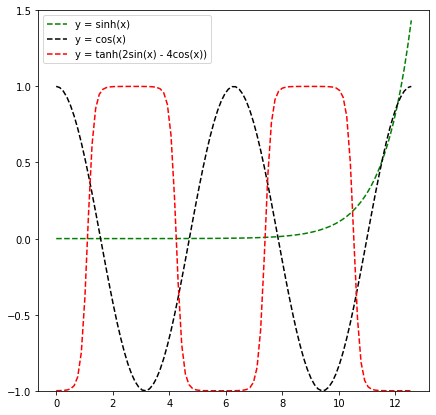

In [22]:
# Agrupamos en listas las variables que vamos a usar para la visualización
legend = ['y = sinh(x)','y = cos(x)','y = tanh(2sin(x) - 4cos(x))']
data   = [vsin,vcos,vtanh]
colors = ['green','black','red']

# Creamos la figura
plt.figure(figsize=(7,7))
# Creamos los plots para cada conjunto de valores
for count, y in enumerate(data):
    plt.plot(values, y, linestyle='dashed', color = colors[count], label=legend[count])
plt.ylim(-1,1.5)
plt.legend(legend, loc='upper left')
plt.show()


# Ejercicio 4

Duda, las figuras están a otro color ¿Pasa algo? y tampoco son exactamente iguales pasa algo?


In [23]:
x,y = sp.symbols('x y')
f1_sym = sp.Lambda((x,y),sp.simplify(1 - sp.Abs(x+y) - sp.Abs(y-x))) 
f2_sym = sp.Lambda((x,y),sp.simplify(x*y*sp.E**(-x**2 -y**2)))

def f1(w):
    return sp.N(f1_sym(w[0],w[1]))

def f2(w):
    return sp.N(f2_sym(w[0],w[1]))

In [24]:
f1_sym

Lambda((x, y), -Abs(x - y) - Abs(x + y) + 1)

In [25]:
f2_sym

Lambda((x, y), x*y*exp(-x**2 - y**2))

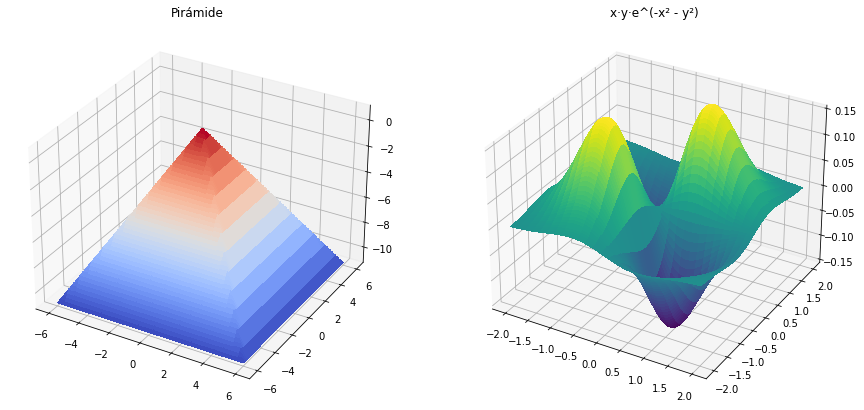

In [34]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
# Creamos la figura con un tamaño de ventana 10x10
fig = plt.figure(figsize=(15,15))

# Primera figura
ax = fig.add_subplot(1,2,1,projection='3d')
# Creamos el grid
X = np.linspace(-6,6,100)
Y = np.linspace(-6,6,100)
X, Y = np.meshgrid(X,Y)
# Añadimos superficie
Z = 1 - np.abs(X+Y) - np.abs(Y-X)

surf1 = ax.plot_surface(X,Y,Z,rstride=1, cmap=cm.coolwarm, cstride=4, linewidth= 0, antialiased=False)
#ax.set_zlim(-10,0)
#ax.set_xlim(-7,7)
#ax.set_ylim(-8,8)
ax.set_title("Pirámide")


ax = fig.add_subplot(1,2,2,projection='3d')
X = np.linspace(-2,2,100)
Y = np.linspace(-2,2,100)
X, Y = np.meshgrid(X,Y)
Z = X*Y*np.e**(-X**2 -Y**2)
surf2 = ax.plot_surface(X,Y,Z,rstride=1, cmap=cm.viridis, cstride=4, linewidth= 0, antialiased=False)
ax.set_zlim(-0.15,0.15)
ax.set_title("x·y·e^(-x² - y²)")
plt.show()